In [1]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import mglearn
import konlpy
from wordcloud import WordCloud
%matplotlib inline
plt.rcParams['axes.unicode_minus'] = False

import platform
path = 'c:/Windows/Fonts/malgun.ttf'
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~~')

D:\python2020\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
D:\python2020\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
data = pd.read_csv("clean_ibk최종2.csv",encoding='utf8')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10539 entries, 0 to 10538
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   datetime        10539 non-null  object
 1   up/down         10539 non-null  int64 
 2   clean_content   10539 non-null  object
 3   clean_headline  10539 non-null  object
dtypes: int64(1), object(3)
memory usage: 329.5+ KB


In [4]:
data['datetime'] = data['datetime'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d'))

In [5]:
data.isnull().sum()

datetime          0
up/down           0
clean_content     0
clean_headline    0
dtype: int64

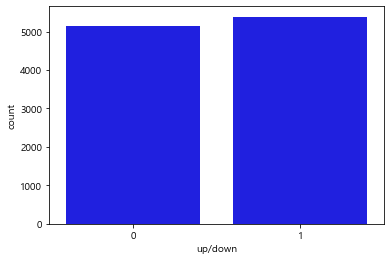

In [6]:
sns.countplot(data['up/down'], color='blue')  
plt.show()

In [7]:
kkma = konlpy.tag.Kkma()

In [9]:
# 명사 추출
my_words = []
for a_line in data['clean_content']:
    my_words += kkma.morphs(a_line)

In [10]:
# 단음절 제거.
my_words_2 = []
for a_word in my_words:
    if len(a_word) > 1:
        my_words_2 += [a_word]

In [11]:
# Series 로 변환.
my_series = pd.Series(my_words_2)

In [12]:
# my_series이거를 데이터프레임에 값으로 붙여서 tfidf만 적용할지 생각해보기..

In [13]:
# 도수 분포표. Top 20
my_word_counts = my_series.value_counts().sort_values(ascending=False)
my_word_counts[:20]

으로    50108
에서    34202
ㄴ다    25983
은행    21635
기업    14644
투자    14535
시장    13445
금리    13038
대출    10081
까지     9588
라고     9297
한국     8790
대하     8657
위하     8620
실적     8268
분기     8233
주가     8172
따르     8104
지원     7943
지만     7640
dtype: int64

In [14]:
my_word_counts.count()

42945

In [15]:
my_word_counts.describe()

count    42945.000000
mean        61.811503
std        486.608405
min          1.000000
25%          1.000000
50%          3.000000
75%         14.000000
max      50108.000000
dtype: float64

D:\python2020\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 36164 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\python2020\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 36164 missing from current font.
  font.set_text(s, 0, flags=flags)


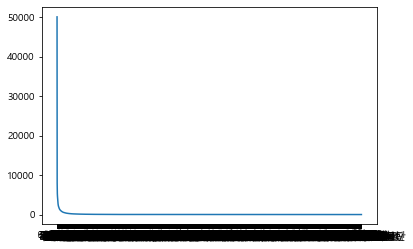

In [22]:
plt.plot(my_word_counts)
plt.show()

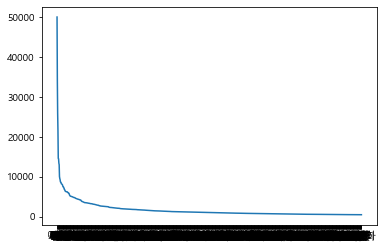

In [17]:
plt.plot(my_word_counts[:1000])
plt.show()

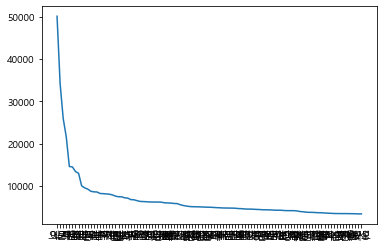

In [18]:
plt.plot(my_word_counts[:100])
plt.show()

In [19]:
a_long_sentence = ' '.join(my_words_2)

In [20]:
wc = WordCloud(font_path="c:/Windows/Fonts/malgun.ttf", background_color='white', max_words=30)  # 바탕색, 단어 개수 등 설정.
wc.generate(a_long_sentence)
wc.words_

{'영업 이익': 1.0,
 '담보 대출': 0.9699582027168234,
 'co kr': 0.8594566353187043,
 '지만': 0.7988505747126436,
 '경우': 0.7102925809822361,
 '라고 말하': 0.6342737722048067,
 '대출 금리': 0.6282654127481714,
 '시장 에서': 0.5718390804597702,
 '때문': 0.5436259143155695,
 '함께': 0.5376175548589341,
 '아니': 0.536833855799373,
 '올해': 0.514367816091954,
 '회사': 0.5005224660397074,
 '금리 인상': 0.49738766980146293,
 '지나': 0.4454022988505747,
 '으로 예상': 0.4315569487983281,
 '어야 ㄴ다': 0.4265935214211076,
 '면서': 0.416405433646813,
 '금리 비교': 0.40856844305120166,
 '는데': 0.4070010449320794,
 '국민 은행': 0.4049111807732497,
 '다고 밝히': 0.4007314524555904,
 '주택 담보': 0.3991640543364681,
 '매수 매도': 0.39759665621734586,
 '매도 수익률': 0.38557993730407525,
 '대하': 0.3842737722048067,
 '모두': 0.38140020898641586,
 '최근': 0.38140020898641586,
 '시중 은행': 0.3790491118077325,
 '신한 은행': 0.3774817136886102}

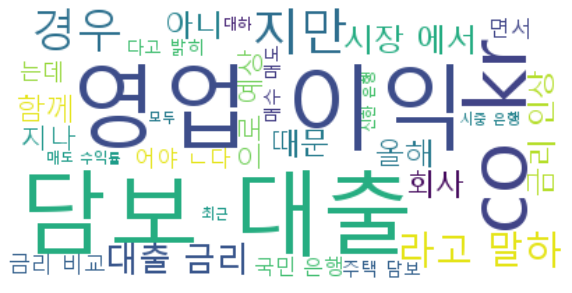

In [21]:
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")                                    # 축을 꺼줌.
plt.show()